In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as pp

In [2]:
def newton( F, JF, x, tol = 1e-6 ):
    
    stop = False
    
    while not stop:
        
        s = np.linalg.solve( JF( x ), -F( x ) )
        x = x + s
        
        stop = ( np.linalg.norm( s ) <= tol )
        
    return x

In [3]:
( x_1, x_2 ) = sp.symbols( 'x_1 x_2', real = True )

In [4]:
n = 10
print( sp.re( ( x_1 + sp.I * x_2 ) ** n ) )

x_1**10 - 45*x_1**8*x_2**2 + 210*x_1**6*x_2**4 - 210*x_1**4*x_2**6 + 45*x_1**2*x_2**8 - x_2**10


In [5]:
def mostra_fractal( N, n ):
    
    F_1 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.re( ( x_1 + sp.I * x_2 ) ** n )
    )
    F_2 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.im( ( x_1 + sp.I * x_2 ) ** n )
    )

    def F( x ):

        return np.array(
            [
                F_1( x[ 0 ], x[ 1 ] ) - 1.0,
                F_2( x[ 0 ], x[ 1 ] )
            ]
        )

    JF_11 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.diff( sp.re( ( x_1 + sp.I * x_2 ) ** n ), x_1 )
    )
    JF_12 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.diff( sp.re( ( x_1 + sp.I * x_2 ) ** n ), x_2 )
    )
    JF_21 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.diff( sp.im( ( x_1 + sp.I * x_2 ) ** n ), x_1 )
    )
    JF_22 = sp.utilities.lambdify(
        ( x_1, x_2 ),
        sp.diff( sp.im( ( x_1 + sp.I * x_2 ) ** n ), x_2 )
    )

    def JF( x ):

        return np.array(
            [
                [ JF_11( x[ 0 ], x[ 1 ] ), JF_12( x[ 0 ], x[ 1 ] ) ],
                [ JF_21( x[ 0 ], x[ 1 ] ), JF_22( x[ 0 ], x[ 1 ] ) ]
            ]
        )
    
    raizes = np.array(
        [ np.cos( 2 * np.pi / n * k ) + 1.0j * np.sin( 2 * np.pi / n * k ) for k in range( n ) ]
    )
    
    colors = [ 'red', 'green', 'blue', 'cyan', 'yellow', 'black', 'orange', 'pink' ]
    result = np.empty( ( N, N ) )
    
    
    for i in range( N ):
        for j in range( N ):
            
            x_re = -1.0 + 2 * j / ( N - 1 )
            x_im = -1.0 + 2 * i / ( N - 1 )
            
            x = newton( F, JF, np.array( [ x_re, x_im ] ) )
            
            diffs = np.abs( raizes - ( x[ 0 ] + 1.0j * x[ 1 ] ) )
            idx = np.argmin( diffs )
            
            result[ i, j ] = idx
    
    pp.imshow( result )
    pp.show()
    
    return result

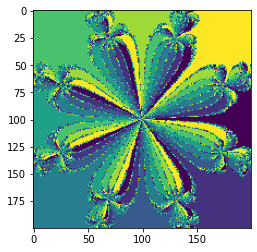

CPU times: user 59.9 s, sys: 2.09 s, total: 1min 1s
Wall time: 59.3 s


In [6]:
%time result = mostra_fractal( 200, 8 )